# Effects of oversampling and SMOTE on count data

In [79]:
import numpy as np
import pandas as pd

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#Plotting libraries and other types
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.ticker as ticker
import seaborn as sns

#Mute warning messages: If errors occur, hash-out this import
import warnings; warnings.simplefilter('ignore')

%matplotlib inline


In [2]:
##Load main cleaned data
volve_full = pd.read_csv('volve_full.csv')
volve_full_data = volve_full.iloc[:,23:] #NB: check this hasn't added an unnamed column in [0]

In [3]:
volve_full_data.columns

Index(['Araucariacidites_australis', 'Bisaccates_undiff.',
       'Chlamydophorella_spp.', 'Cyathidites_spp.', 'Densoisporites_velatus',
       'Exesipollenites_spp.', 'Gonyaulacysta_spp.', 'Gonyaulacysta_cretacea',
       'Leiosphaeridia_spp.', 'Monosulcites_spp.',
       ...
       'Lecaniella_cf._spongiose', 'leiosphere_.thick_walled.',
       'Tasmanites_sp._A', 'Glossodinium_dimorphum', 'Acanthomorph.acritarchs',
       'Bosedinia.spp.', 'Callialasporites.dampierii',
       'Dictyophyllidites.harrisii', 'Dinopterygium.cladoides',
       'fungal_spores.hyphae'],
      dtype='object', length=422)

In [22]:
X = volve_full_data
Y = volve_full['AGE']

In [23]:
'''
Randomly oversample the data for X and Y using RandomOversampler and SMOTE.
'''

## Randomly over-sampling data.

ros = RandomOverSampler(random_state=45) #use defaults: But can manually change no. of samples per class
X_resampled, y_resampled = ros.fit_resample(X, Y)

## Using synthetic over-sampling by K-means distance. Worth a shot.
smote = SMOTE(sampling_strategy='not majority',k_neighbors=3, random_state=45) #use defaults again.
X_sm, y_sm = smote.fit_sample(X, Y)

from collections import Counter
print('\nOriginal data: \n',sorted(Counter(Y).items()))
print('Randomly oversampled data: \n', sorted(Counter(y_resampled).items()))
print('SMOTE data: \n', sorted(Counter(y_sm).items()))



Original data: 
 [('Early Cretaceous', 47), ('Late Cretaceous', 26), ('Late Jurassic', 149), ('Middle Jurassic', 465), ('Triassic?', 7)]
Randomly oversampled data: 
 [('Early Cretaceous', 465), ('Late Cretaceous', 465), ('Late Jurassic', 465), ('Middle Jurassic', 465), ('Triassic?', 465)]
SMOTE data: 
 [('Early Cretaceous', 465), ('Late Cretaceous', 465), ('Late Jurassic', 465), ('Middle Jurassic', 465), ('Triassic?', 465)]


In [25]:
##join oversampled and y, and smote and y data and save to file
os_volve = pd.DataFrame(X_resampled)
os_volve['y_resampled'] = y_resampled

sm_volve = pd.DataFrame(X_sm)
sm_volve['y_sm'] = y_sm


##Rearrange columns so y is the first column (for ease)
cols_os = os_volve.columns.tolist()
cols_os = cols_os[-1:] + cols_os[:-1]
os_volve = os_volve[cols_os]

cols_sm = sm_volve.columns.tolist()
cols_sm = cols_sm[-1:] + cols_sm[:-1]
sm_volve = sm_volve[cols_sm]

In [26]:
##Write to file and then run PCoA in R
os_volve.to_csv('os_volve.csv')
sm_volve.to_csv('sm_volve.csv')

### Import the oversampled and smote PCoA dataframes

In [50]:
##Actual data
info = volve_full[['AGE', 'AXIS_1', 'AXIS_2', 'AXIS_3']]

In [106]:
##Oversampled data
volve_data_os = pd.read_csv('volve_oversampled_PCoA.csv')
info_os = volve_data_os.iloc[:,1:5] #NB: check this hasn't added an unnamed column in [0]
#info_os['AGE'] = volve_full['AGE']

In [107]:
##Smote data
volve_data_sm = pd.read_csv('volve_smote_PCoA.csv')
info_sm = volve_data_sm.iloc[:,1:5]
#info_sm['AGE'] = volve_full['AGE']

### Plot the original data

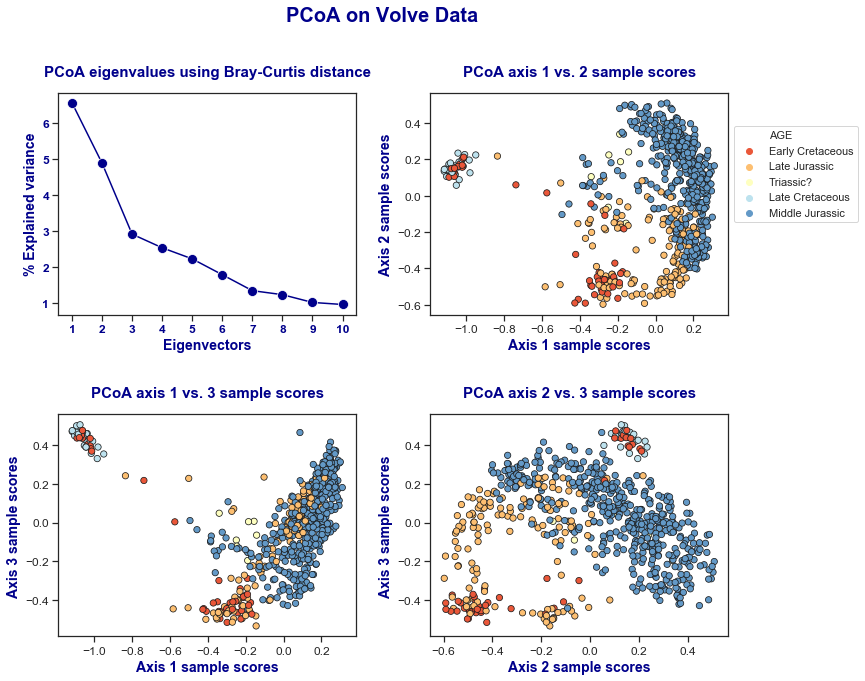

In [142]:
'''
Are the AGES really well defined? Plot PCoA results of axes 1,2 and 3 to explore how well separated
the AGES are from one another. How much variance do the first three axes explain?
'''
sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(12,10))

'''
Load the eigenvalues from the PCoA and show the explained variance in a scree plot
'''
eigen = pd.read_csv('PCoA_eigenvalues_bray.csv') #computed using R and exported as .csv file
#eigen.head()

##Scree plot
plt.subplot(221)
ax4 = sns.lineplot(data=eigen['x'][1:11], linewidth=1.5, marker='o', ms=10, color='darkblue') #plot first 10 eigenvalues
ax4.set_title('PCoA eigenvalues using Bray-Curtis distance', fontsize=15, weight='bold', y=1.05, color='darkblue')
ax4.set_ylabel('% Explained variance', fontsize=14, weight='bold', color='darkblue')
ax4.set_xlabel('Eigenvectors', fontsize=14, weight='bold', color='darkblue')
ax4.tick_params(labelsize=12)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax4.set_yticklabels(range(0,7), weight='bold', color='darkblue')
ax4.set_xticklabels(range(0,11),weight='bold',color='darkblue')

##Axis 1 vs. 2
plt.subplot(222)
ax1 = sns.scatterplot(x='AXIS_1', y='AXIS_2', hue='AGE', data=info, 
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax1.set_title('PCoA axis 1 vs. 2 sample scores', fontsize=15, weight='bold', y=1.05,color='darkblue')
ax1.set_ylabel('Axis 2 sample scores', fontsize=14, color='darkblue', weight='bold')
ax1.set_xlabel('Axis 1 sample scores', fontsize=14, color='darkblue', weight='bold')
ax1.tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.02, 0.85),loc=2, borderaxespad=0.) #Plot legend outside area

##Axis 1 vs. 3
plt.subplot(223)
ax2 = sns.scatterplot(x='AXIS_1', y='AXIS_3', hue='AGE', data=info,legend=False, 
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax2.set_title('PCoA axis 1 vs. 3 sample scores', fontsize=15, weight='bold', y=1.05,color='darkblue')
ax2.set_ylabel('Axis 3 sample scores', fontsize=14, color='darkblue', weight='bold')
ax2.set_xlabel('Axis 1 sample scores', fontsize=14, color='darkblue', weight='bold')
ax2.tick_params(labelsize=12)

##Axis 2 vs. 3
plt.subplot(224)
ax3 = sns.scatterplot(x='AXIS_2', y='AXIS_3', hue='AGE', data=info,legend=False,
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax3.set_title('PCoA axis 2 vs. 3 sample scores', fontsize=15, weight='bold', y=1.05, color='darkblue')
ax3.set_ylabel('Axis 3 sample scores', fontsize=14, color='darkblue', weight='bold')
ax3.set_xlabel('Axis 2 sample scores', fontsize=14, color='darkblue', weight='bold')
ax3.tick_params(labelsize=12)

plt.suptitle('PCoA on Volve Data', y=1, fontsize=20, weight='bold', color='darkblue')
plt.subplots_adjust(wspace=0.25, hspace=0.45)
plt.show()
# plt.savefig('PCoA_Volve_axes1_2_3_comparisons.png',dpi=400,bbox_inches='tight', transparent=True)

### Plot the Oversampled data

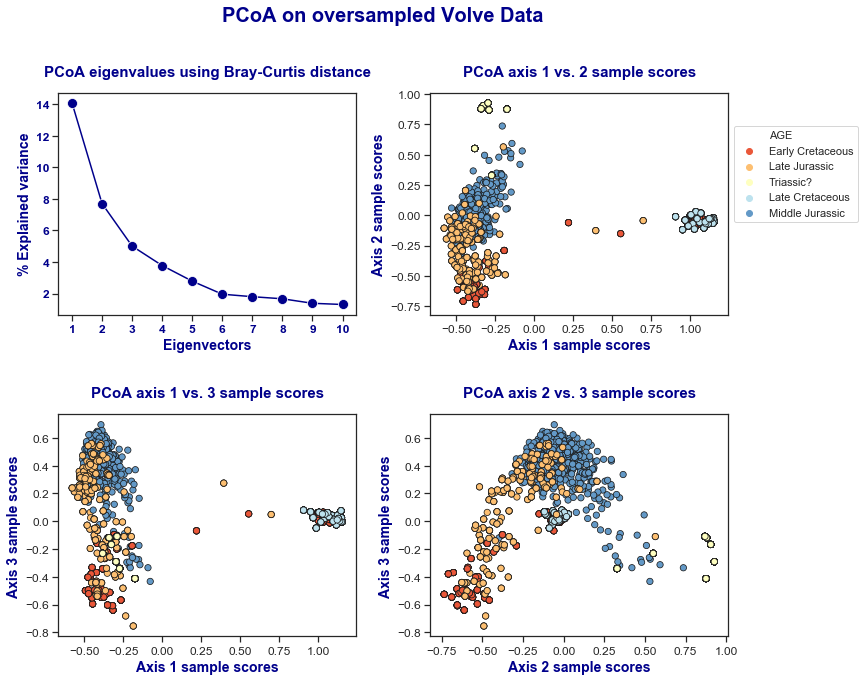

In [143]:
sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(12,10))

'''
Load the eigenvalues from the PCoA and show the explained variance in a scree plot
'''
eigen = pd.read_csv('PCoA_eigenvalues_Oversampled.csv') #computed using R and exported as .csv file
#eigen.head()

##Scree plot
plt.subplot(221)
ax4 = sns.lineplot(data=eigen['x'][1:11], linewidth=1.5, marker='o', ms=10, color='darkblue') #plot first 10 eigenvalues
ax4.set_title('PCoA eigenvalues using Bray-Curtis distance', fontsize=15, weight='bold', y=1.05, color='darkblue')
ax4.set_ylabel('% Explained variance', fontsize=14, weight='bold', color='darkblue')
ax4.set_xlabel('Eigenvectors', fontsize=14, weight='bold', color='darkblue')
ax4.tick_params(labelsize=12)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax4.set_yticklabels(range(0,16,2), weight='bold', color='darkblue')
ax4.set_xticklabels(range(0,11),weight='bold',color='darkblue')

##Axis 1 vs. 2
plt.subplot(222)
ax1 = sns.scatterplot(x='Axis_1', y='Axis_2', hue='AGE', data=info_os, 
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax1.set_title('PCoA axis 1 vs. 2 sample scores', fontsize=15, weight='bold', y=1.05,color='darkblue')
ax1.set_ylabel('Axis 2 sample scores', fontsize=14, color='darkblue', weight='bold')
ax1.set_xlabel('Axis 1 sample scores', fontsize=14, color='darkblue', weight='bold')
ax1.tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.02, 0.85),loc=2, borderaxespad=0.) #Plot legend outside area

##Axis 1 vs. 3
plt.subplot(223)
ax2 = sns.scatterplot(x='Axis_1', y='Axis_3', hue='AGE', data=info_os,legend=False, 
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax2.set_title('PCoA axis 1 vs. 3 sample scores', fontsize=15, weight='bold', y=1.05,color='darkblue')
ax2.set_ylabel('Axis 3 sample scores', fontsize=14, color='darkblue', weight='bold')
ax2.set_xlabel('Axis 1 sample scores', fontsize=14, color='darkblue', weight='bold')
ax2.tick_params(labelsize=12)

##Axis 2 vs. 3
plt.subplot(224)
ax3 = sns.scatterplot(x='Axis_2', y='Axis_3', hue='AGE', data=info_os,legend=False,
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax3.set_title('PCoA axis 2 vs. 3 sample scores', fontsize=15, weight='bold', y=1.05, color='darkblue')
ax3.set_ylabel('Axis 3 sample scores', fontsize=14, color='darkblue', weight='bold')
ax3.set_xlabel('Axis 2 sample scores', fontsize=14, color='darkblue', weight='bold')
ax3.tick_params(labelsize=12)

plt.suptitle('PCoA on oversampled Volve Data', y=1, fontsize=20, weight='bold', color='darkblue')
plt.subplots_adjust(wspace=0.25, hspace=0.45)
plt.show()
# plt.savefig('PCoA_oversampled_Volve_axes1_2_3.png',dpi=400,bbox_inches='tight', transparent=True)

### Plot the SMOTE PCoA data

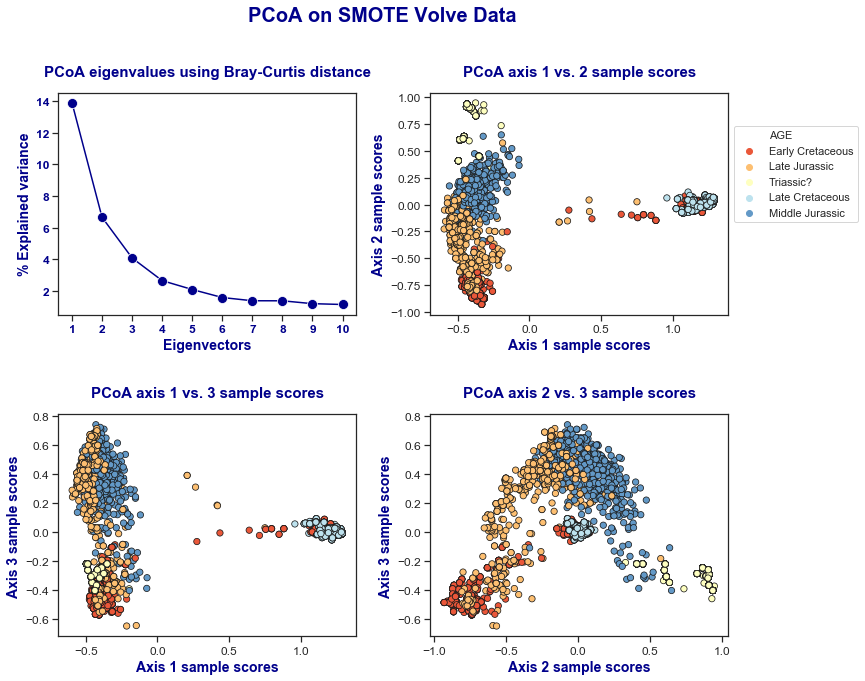

In [144]:
sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(12,10))

'''
Load the eigenvalues from the PCoA and show the explained variance in a scree plot
'''
eigen = pd.read_csv('PCoA_eigenvalues_smote.csv') #computed using R and exported as .csv file
#eigen.head()

##Scree plot
plt.subplot(221)
ax4 = sns.lineplot(data=eigen['x'][1:11], linewidth=1.5, marker='o', ms=10, color='darkblue') #plot first 10 eigenvalues
ax4.set_title('PCoA eigenvalues using Bray-Curtis distance', fontsize=15, weight='bold', y=1.05, color='darkblue')
ax4.set_ylabel('% Explained variance', fontsize=14, weight='bold', color='darkblue')
ax4.set_xlabel('Eigenvectors', fontsize=14, weight='bold', color='darkblue')
ax4.tick_params(labelsize=12)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax4.set_yticklabels(range(0,16,2), weight='bold', color='darkblue')
ax4.set_xticklabels(range(0,11),weight='bold',color='darkblue')

##Axis 1 vs. 2
plt.subplot(222)
ax1 = sns.scatterplot(x='Axis_1', y='Axis_2', hue='AGE', data=info_sm, 
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax1.set_title('PCoA axis 1 vs. 2 sample scores', fontsize=15, weight='bold', y=1.05,color='darkblue')
ax1.set_ylabel('Axis 2 sample scores', fontsize=14, color='darkblue', weight='bold')
ax1.set_xlabel('Axis 1 sample scores', fontsize=14, color='darkblue', weight='bold')
ax1.tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.02, 0.85),loc=2, borderaxespad=0.) #Plot legend outside area

##Axis 1 vs. 3
plt.subplot(223)
ax2 = sns.scatterplot(x='Axis_1', y='Axis_3', hue='AGE', data=info_sm,legend=False, 
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax2.set_title('PCoA axis 1 vs. 3 sample scores', fontsize=15, weight='bold', y=1.05,color='darkblue')
ax2.set_ylabel('Axis 3 sample scores', fontsize=14, color='darkblue', weight='bold')
ax2.set_xlabel('Axis 1 sample scores', fontsize=14, color='darkblue', weight='bold')
ax2.tick_params(labelsize=12)

##Axis 2 vs. 3
plt.subplot(224)
ax3 = sns.scatterplot(x='Axis_2', y='Axis_3', hue='AGE', data=info_sm,legend=False,
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax3.set_title('PCoA axis 2 vs. 3 sample scores', fontsize=15, weight='bold', y=1.05, color='darkblue')
ax3.set_ylabel('Axis 3 sample scores', fontsize=14, color='darkblue', weight='bold')
ax3.set_xlabel('Axis 2 sample scores', fontsize=14, color='darkblue', weight='bold')
ax3.tick_params(labelsize=12)

plt.suptitle('PCoA on SMOTE Volve Data', y=1, fontsize=20, weight='bold', color='darkblue')
plt.subplots_adjust(wspace=0.25, hspace=0.45)
plt.show()
# plt.savefig('PCoA_smote_Volve_axes1_2_3.png',dpi=400,bbox_inches='tight', transparent=True)

### What do the minority classes look like?

#### Raw data

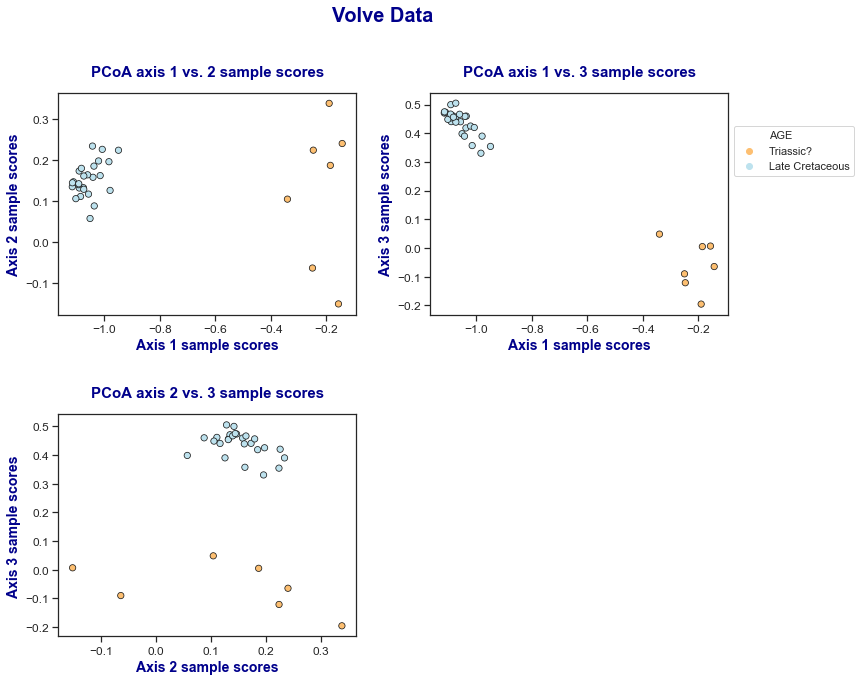

In [145]:
'''
Subset the smallest classes and plot these:
Triassic? (7)
Late Cretaceous (20)
'''

triassic = info.loc[(info['AGE'] == 'Triassic?')]
late_k = info.loc[(info['AGE'] == 'Late Cretaceous')]
minority = pd.concat([triassic,late_k])

sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(12,10))

# ##Axis 1 vs. 2
plt.subplot(221)
ax1 = sns.scatterplot(x='AXIS_1', y='AXIS_2', hue='AGE', data=minority, legend=False,
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax1.set_title('PCoA axis 1 vs. 2 sample scores', fontsize=15, weight='bold', y=1.05,color='darkblue')
ax1.set_ylabel('Axis 2 sample scores', fontsize=14, color='darkblue', weight='bold')
ax1.set_xlabel('Axis 1 sample scores', fontsize=14, color='darkblue', weight='bold')
ax1.tick_params(labelsize=12)


##Axis 1 vs. 3
plt.subplot(222)
ax2 = sns.scatterplot(x='AXIS_1', y='AXIS_3', hue='AGE', data=minority, 
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax2.set_title('PCoA axis 1 vs. 3 sample scores', fontsize=15, weight='bold', y=1.05,color='darkblue')
ax2.set_ylabel('Axis 3 sample scores', fontsize=14, color='darkblue', weight='bold')
ax2.set_xlabel('Axis 1 sample scores', fontsize=14, color='darkblue', weight='bold')
ax2.tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.02, 0.85),loc=2, borderaxespad=0.) #Plot legend outside area

##Axis 2 vs. 3
plt.subplot(223)
ax3 = sns.scatterplot(x='AXIS_2', y='AXIS_3', hue='AGE', data=minority,legend=False,
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax3.set_title('PCoA axis 2 vs. 3 sample scores', fontsize=15, weight='bold', y=1.05, color='darkblue')
ax3.set_ylabel('Axis 3 sample scores', fontsize=14, color='darkblue', weight='bold')
ax3.set_xlabel('Axis 2 sample scores', fontsize=14, color='darkblue', weight='bold')
ax3.tick_params(labelsize=12)

plt.suptitle('Volve Data', y=1, fontsize=20, weight='bold', color='darkblue')
plt.subplots_adjust(wspace=0.25, hspace=0.45)
plt.show()
# plt.savefig('PCoA_minority_Volve_axes1_2_3.png',dpi=400,bbox_inches='tight', transparent=True)


#### Oversampled data

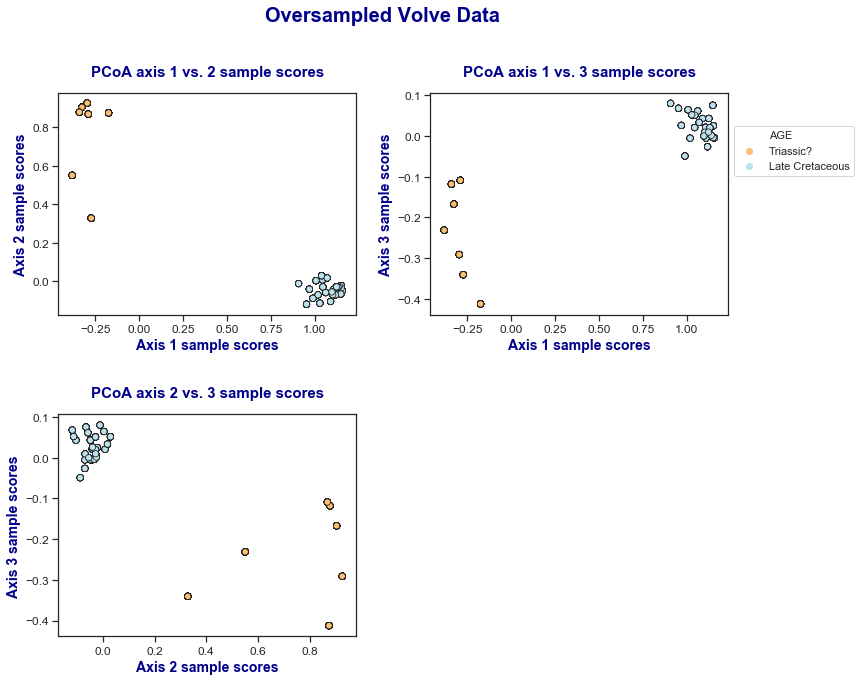

In [147]:
# triassic = info_os.loc[(info_os['AGE'] == 'Triassic?')]
# late_k = info_os.loc[(info_os['AGE'] == 'Late Cretaceous')]
minority = pd.concat([triassic, late_k])
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(12,10))

# ##Axis 1 vs. 2
plt.subplot(221)
ax1 = sns.scatterplot(x='Axis_1', y='Axis_2', hue='AGE', data=minority, legend=False,
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax1.set_title('PCoA axis 1 vs. 2 sample scores', fontsize=15, weight='bold', y=1.05,color='darkblue')
ax1.set_ylabel('Axis 2 sample scores', fontsize=14, color='darkblue', weight='bold')
ax1.set_xlabel('Axis 1 sample scores', fontsize=14, color='darkblue', weight='bold')
ax1.tick_params(labelsize=12)


##Axis 1 vs. 3
plt.subplot(222)
ax2 = sns.scatterplot(x='Axis_1', y='Axis_3', hue='AGE', data=minority, 
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax2.set_title('PCoA axis 1 vs. 3 sample scores', fontsize=15, weight='bold', y=1.05,color='darkblue')
ax2.set_ylabel('Axis 3 sample scores', fontsize=14, color='darkblue', weight='bold')
ax2.set_xlabel('Axis 1 sample scores', fontsize=14, color='darkblue', weight='bold')
ax2.tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.02, 0.85),loc=2, borderaxespad=0.) #Plot legend outside area

##Axis 2 vs. 3
plt.subplot(223)
ax3 = sns.scatterplot(x='Axis_2', y='Axis_3', hue='AGE', data=minority,legend=False,
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax3.set_title('PCoA axis 2 vs. 3 sample scores', fontsize=15, weight='bold', y=1.05, color='darkblue')
ax3.set_ylabel('Axis 3 sample scores', fontsize=14, color='darkblue', weight='bold')
ax3.set_xlabel('Axis 2 sample scores', fontsize=14, color='darkblue', weight='bold')
ax3.tick_params(labelsize=12)

plt.suptitle('Oversampled Volve Data', y=1, fontsize=20, weight='bold', color='darkblue')
plt.subplots_adjust(wspace=0.25, hspace=0.45)
plt.show()
# plt.savefig('PCoA_minority_oversampled_Volve_axes1_2_3.png',dpi=400,bbox_inches='tight', transparent=True)

#### SMOTE data

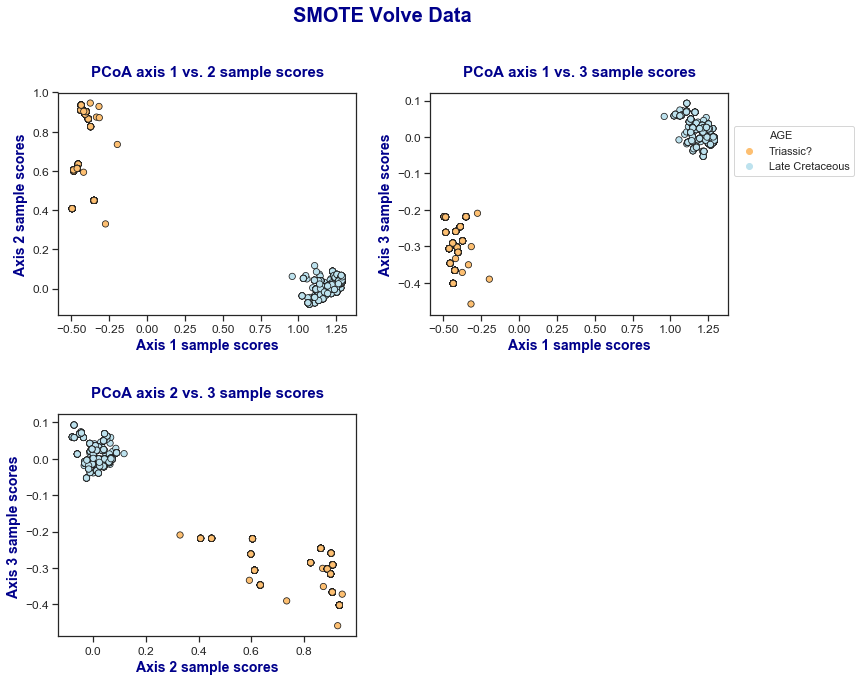

In [148]:
triassic = info_sm.loc[(info_sm['AGE'] == 'Triassic?')]
late_k = info_sm.loc[(info_sm['AGE'] == 'Late Cretaceous')]
minority = pd.concat([triassic, late_k])



sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(12,10))

# ##Axis 1 vs. 2
plt.subplot(221)
ax1 = sns.scatterplot(x='Axis_1', y='Axis_2', hue='AGE', data=minority, legend=False,
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax1.set_title('PCoA axis 1 vs. 2 sample scores', fontsize=15, weight='bold', y=1.05,color='darkblue')
ax1.set_ylabel('Axis 2 sample scores', fontsize=14, color='darkblue', weight='bold')
ax1.set_xlabel('Axis 1 sample scores', fontsize=14, color='darkblue', weight='bold')
ax1.tick_params(labelsize=12)


##Axis 1 vs. 3
plt.subplot(222)
ax2 = sns.scatterplot(x='Axis_1', y='Axis_3', hue='AGE', data=minority, 
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax2.set_title('PCoA axis 1 vs. 3 sample scores', fontsize=15, weight='bold', y=1.05,color='darkblue')
ax2.set_ylabel('Axis 3 sample scores', fontsize=14, color='darkblue', weight='bold')
ax2.set_xlabel('Axis 1 sample scores', fontsize=14, color='darkblue', weight='bold')
ax2.tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.02, 0.85),loc=2, borderaxespad=0.) #Plot legend outside area

##Axis 2 vs. 3
plt.subplot(223)
ax3 = sns.scatterplot(x='Axis_2', y='Axis_3', hue='AGE', data=minority,legend=False,
                     alpha=1, s=40,palette="RdYlBu", edgecolor='k')
ax3.set_title('PCoA axis 2 vs. 3 sample scores', fontsize=15, weight='bold', y=1.05, color='darkblue')
ax3.set_ylabel('Axis 3 sample scores', fontsize=14, color='darkblue', weight='bold')
ax3.set_xlabel('Axis 2 sample scores', fontsize=14, color='darkblue', weight='bold')
ax3.tick_params(labelsize=12)

plt.suptitle('SMOTE Volve Data', y=1, fontsize=20, weight='bold', color='darkblue')
plt.subplots_adjust(wspace=0.25, hspace=0.45)
plt.show()
# plt.savefig('PCoA_minority_smote_Volve_axes1_2_3.png',dpi=400,bbox_inches='tight', transparent=True)